In [1]:
using ConstLab
using Plots
using Voigt
gadfly();

[Plots.jl] Default backend: immerse
[Plots.jl] Switched to backend: gadfly


In [2]:
include("crystal_plasticity.jl")

compute_residual (generic function with 1 method)

In [67]:
angles = [75.0, 75.0 + 180.0]
mp = CrystPlastMP(200000.0, 0.3, 1000.0, 2.0, 10000.0, 0.1, 1.0, 1000.0, angles)

CrystPlastMP
  E: 200000.0
  ν: 0.3
  σy: 1000.0
  n: 2.0
  H: 10000.0
  q: 0.1
  D: 1.0
  tstar: 1000.0
  angles: [75.0,255.0]
  sxm_sym: [[-0.24999999999999997,0.24999999999999983,0.0,0.0,0.0,-0.4330127018922194],[-0.2499999999999999,0.24999999999999994,0.0,0.0,0.0,-0.4330127018922194]]
  nslip: 2

In [68]:
ms = CrystPlastMS(length(angles))

CrystPlastMS
  n_ε_p: [0.0,0.0,0.0,0.0,0.0,0.0]
  n_κ: [0.0,0.0]
  n_τ: [0.0,0.0]
  n_μ: [0.0,0.0]

In [69]:
tend = 1.0
ts = collect(linspace(0, tend, 100))
ε_max = 0.05
εs_pstrain, σs_pstrain, ε_control_pstrain = loadcase(:uniaxial_strain, ε_max, ts);

In [70]:
εs_res_pstrain, σs_res_pstrain, matstats = driver(ms, mp, ts, εs_pstrain, 
σs_pstrain, ε_control_pstrain);

In [71]:
vm(x) = sqrt(3/2) * vnorm(dev(x))

vm (generic function with 1 method)

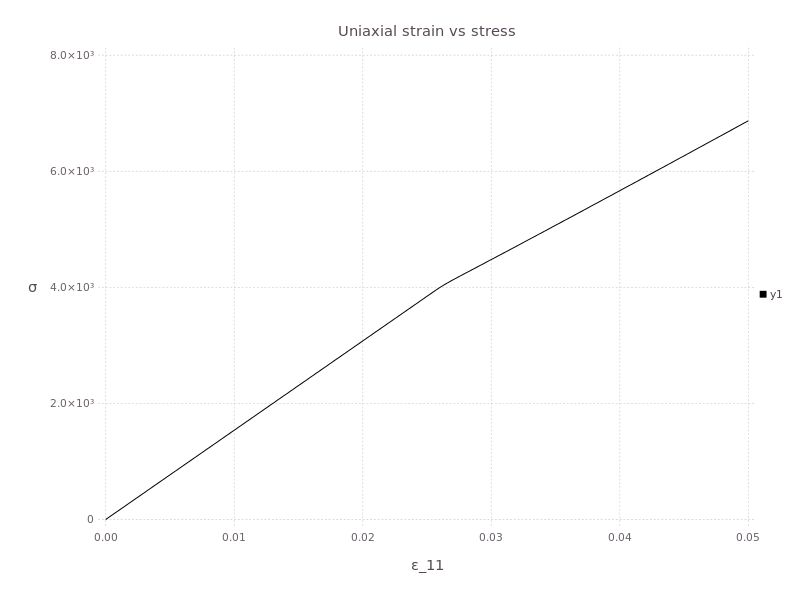

In [72]:
p = plot(εs_res_pstrain, σs_res_pstrain, matstats; x_mod = 1, y_mod = vm);
xlabel!(p, "ε_11"); ylabel!(p, "σ"); title!(p, "Uniaxial strain vs stress")

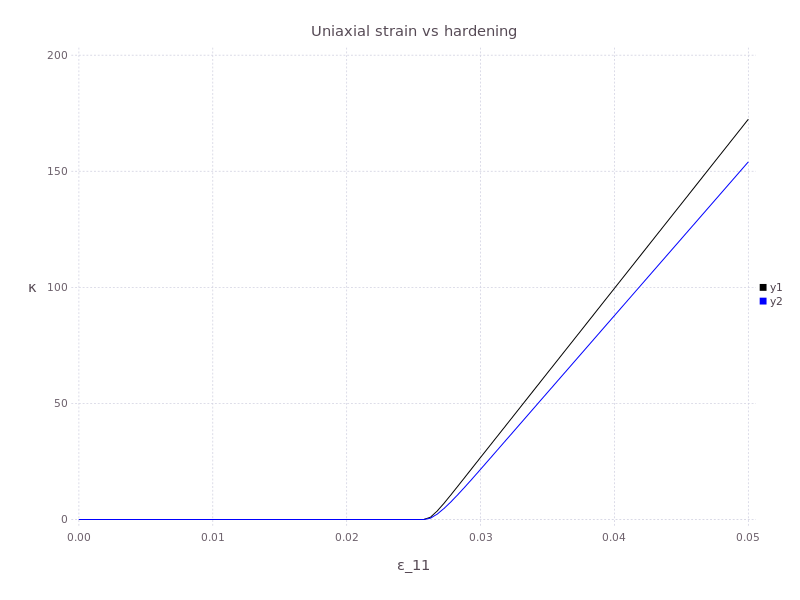

In [73]:
q = plot(εs_res_pstrain, :n_κ, matstats; x_mod = 1, y_mod = 1)
plot!(q, εs_res_pstrain, :n_κ, matstats; x_mod = 1, y_mod = 2)
xlabel!("ε_11"); ylabel!("κ"); title!("Uniaxial strain vs hardening")

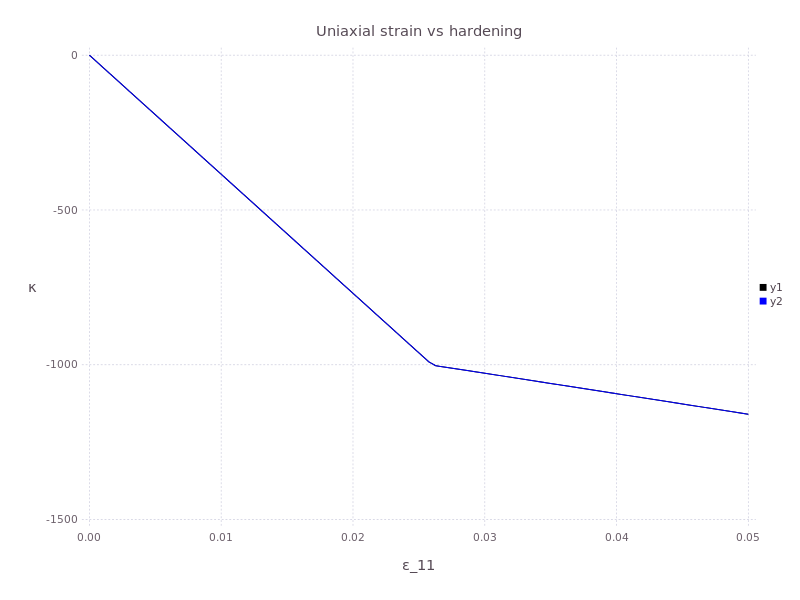

In [76]:
q = plot(εs_res_pstrain, :n_τ, matstats; x_mod = 1, y_mod = 1)
plot!(q, εs_res_pstrain, :n_τ, matstats; x_mod = 1, y_mod = 2)
xlabel!("ε_11"); ylabel!("κ"); title!("Uniaxial strain vs hardening")